<a href="https://colab.research.google.com/github/hajerbaomar/19f19285/blob/main/hajeripynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os

os.environ['KAGGLE_USERNAME'] = 'hajerbaomar'
os.environ['KAGGLE_KEY'] = '8529a21a0ae62215fd5180f32bf148ff'

In [3]:
!kaggle datasets download -d vijaygiitk/multiclass-weather-dataset

 91% 122M/134M [00:01<00:00, 69.9MB/s]
100% 134M/134M [00:01<00:00, 81.5MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile(r'/content/multiclass-weather-dataset.zip')
zip_ref.extractall(r'/content')
zip_ref.close()

In [5]:
import tensorflow as tf 
from tensorflow import keras
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [34]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset', 
    labels='inferred', 
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)  )

Found 1530 files belonging to 6 classes.


In [36]:
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/dataset',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 1530 files belonging to 6 classes.


In [37]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

In [38]:
train_ds = train_ds.map(process) 
validation_ds = validation_ds.map(process)
     

In [39]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

In [40]:
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


In [41]:
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


In [42]:
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


In [43]:
model.add(Flatten())

In [44]:
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))

In [45]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [46]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 254, 254, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                        

In [47]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics='accuracy')

In [48]:
from keras.callbacks import History
History=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
48/48 [==============================] - 467s 10s/step - loss: -103442.5938 - accuracy: 0.1895 - val_loss: -20702.1250 - val_accuracy: 0.1961
Epoch 2/10
48/48 [==============================] - 460s 10s/step - loss: -1784188.6250 - accuracy: 0.1961 - val_loss: -193510.4219 - val_accuracy: 0.1961
Epoch 3/10
48/48 [==============================] - 410s 9s/step - loss: -10767281.0000 - accuracy: 0.1961 - val_loss: -3009666.5000 - val_accuracy: 0.1961
Epoch 4/10
48/48 [==============================] - 453s 9s/step - loss: -41767576.0000 - accuracy: 0.1961 - val_loss: -27103534.0000 - val_accuracy: 0.1961
Epoch 5/10
48/48 [==============================] - 459s 10s/step - loss: -127803424.0000 - accuracy: 0.1961 - val_loss: -66701728.0000 - val_accuracy: 0.1961
Epoch 6/10
48/48 [==============================] - 454s 9s/step - loss: -309663840.0000 - accuracy: 0.1961 - val_loss: -170974704.0000 - val_accuracy: 0.1961
Epoch 7/10
48/48 [==============================] - 453s 9s/s

In [50]:
import matplotlib.pyplot as plt

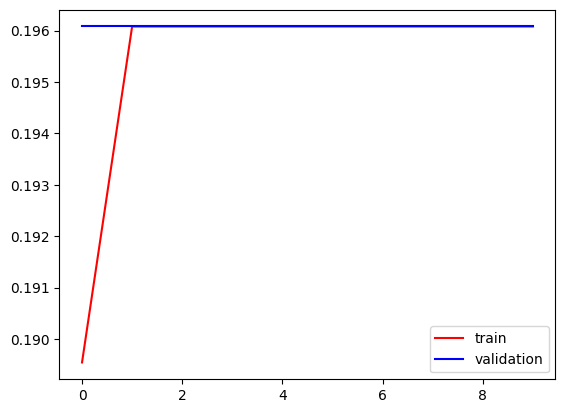

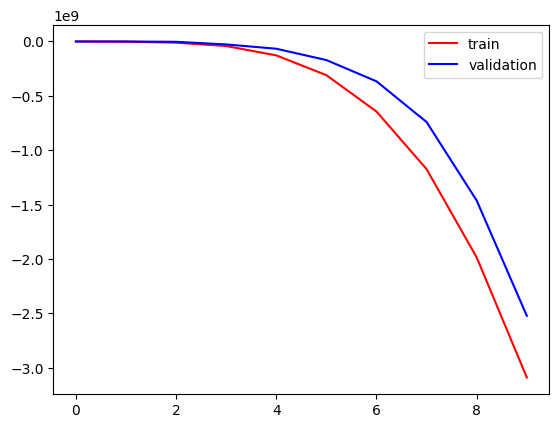

In [51]:
plt.plot(History.history['accuracy'],color='red',label='train')
plt.plot(History.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


plt.plot(History.history['loss'],color='red',label='train')
plt.plot(History.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [52]:
import cv2

In [57]:
from IPython.testing import test
test_img = cv2.imread('/content/dataset/rainy/rain103.jpg')

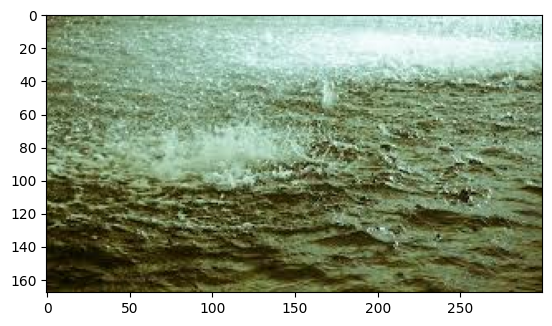

In [58]:
plt.imshow(test_img)

In [59]:
test_img.shape

(168, 300, 3)

In [60]:
test_img = cv2.resize(test_img,(256,256))  

In [61]:
test_input = test_img.reshape((1,256,256,3)) 

In [62]:
model.predict(test_input)  

1/1 [==============================] - 0s 329ms/step


array([[1.]], dtype=float32)